<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 5: Ensemble Methods </h1>
    <h3></h3>
</center>

## <center> Case: Pet Classification

## Coding section
### Abstract:

<font face="Times New Roman">Consider the classification problem of pet classification.</font>

<font face="Times New Roman">1. Data processing: We load the "pet_class.csv" dataset and plot the first 5 samples to preview.</font>

<font face="Times New Roman">2. Model training and prediction: We use the DecisionTreeClassifier model and RandomForestClassifier to fit the training set data and predict the classes of the test set. Calculate the accuracy to evaluate the performance of two models.</font>
    
<font face="Times New Roman">3. Visualizing results: (1) Confusion Matrix. (2) Plot the multi-class ROC curve.</font>

### Problem Description:
    
<font face="Times New Roman">The dataset contains 10 features: Fur, Size, Shape, Ears, Tail, Vocal, Behavior, Legs, Eyes, Habitat. The target variable (label) contains three classes: dog, cat, and rabbit.

Our goal is to use ensemble learning methods to improve the predictive performance of base models.

### 1. Data processing

In [1]:
# Load Packages
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder

In [2]:
# Data Loading
data = pd.read_csv('pet_class.csv')
print(data.head())

X = data.drop('Class', axis=1).values  
y = data['Class'].values

le = LabelEncoder()
y = le.fit_transform(y)

   Fur  Size  Shape  Ears  Tail  Vocal  Behavior  Legs  Eyes  Habitat   Class
0  8.0   5.0    9.0   8.0  10.0    7.0      11.0  12.0  11.0     10.0     cat
1  9.0   9.0    7.0   8.0   5.0    7.0      10.0  13.0  12.0     10.0  rabbit
2  9.0  10.0    1.0   9.0   4.0   13.0       6.0   9.0   9.0      8.0  rabbit
3  7.0  10.0    8.0   8.0   9.0   10.0       8.0   9.0   8.0     10.0  rabbit
4  9.0   7.0    7.0   6.0   8.0   10.0       9.0   9.0   8.0     11.0     dog


In [3]:
from sklearn.model_selection import train_test_split  
# obtain training and testing datasets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

### 2. Model training and prediction

Fill in the blanks.

In [4]:
# Load Python packages for the decision tree and the random forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # if error: pip install xgboost

In [5]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=None)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
y_score_dt = dt_clf.predict_proba(X_test)

# Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_score_rf = rf_clf.predict_proba(X_test)

#XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_score_xgb = xgb_clf.predict_proba(X_test)



c:\Users\LiuYuchen\Anaconda\envs\PyTorch_L\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:00:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [6]:
# Load Python packages to evaluate the performance
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

Decision Tree Accuracy: 0.8267
Random Forest Accuracy: 0.9333
XGBoost Accuracy: 0.9317


### 3. Visualizing results

### 3.1 Confusion Matrix
Fill in the blanks.

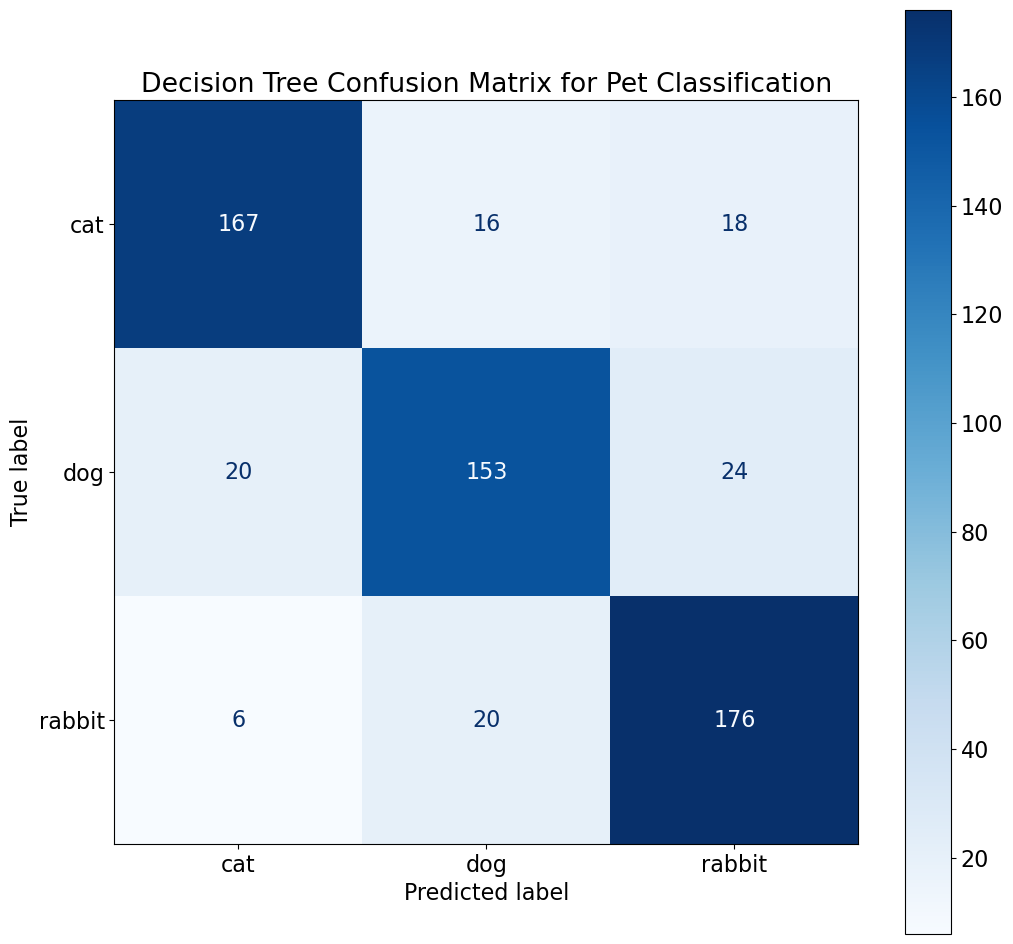

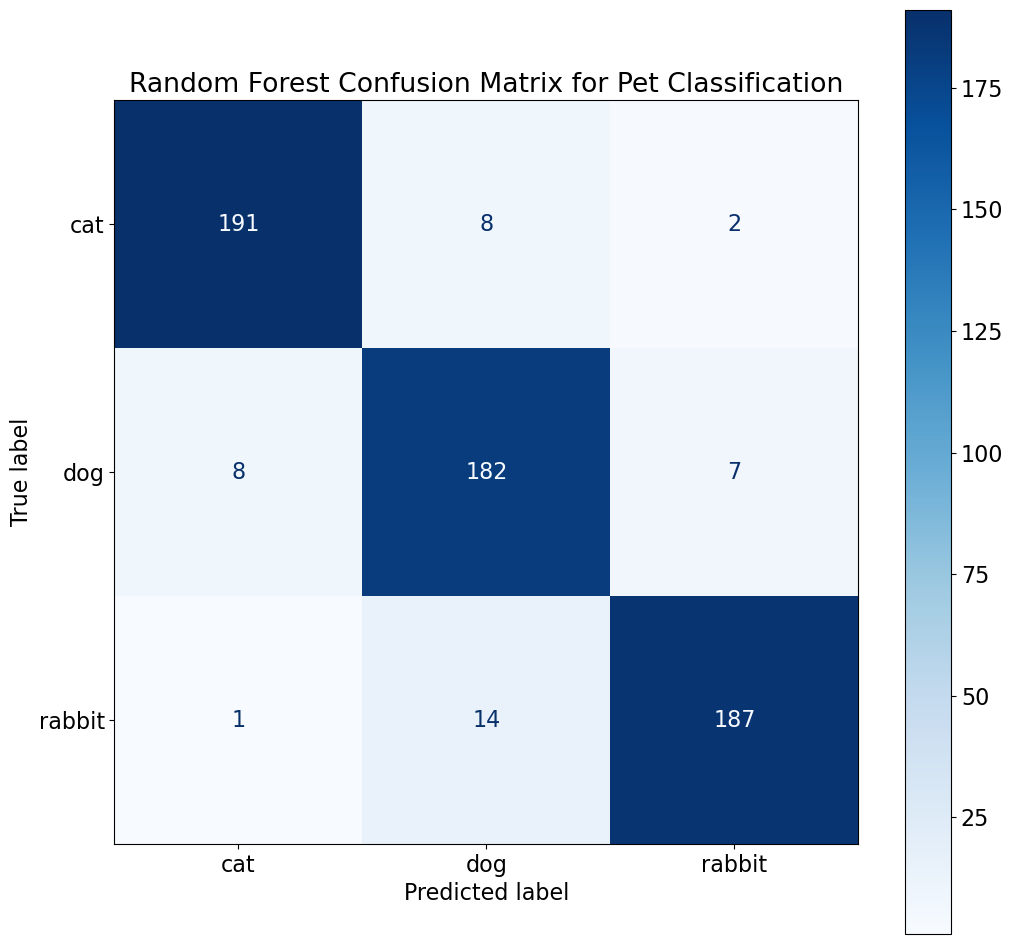

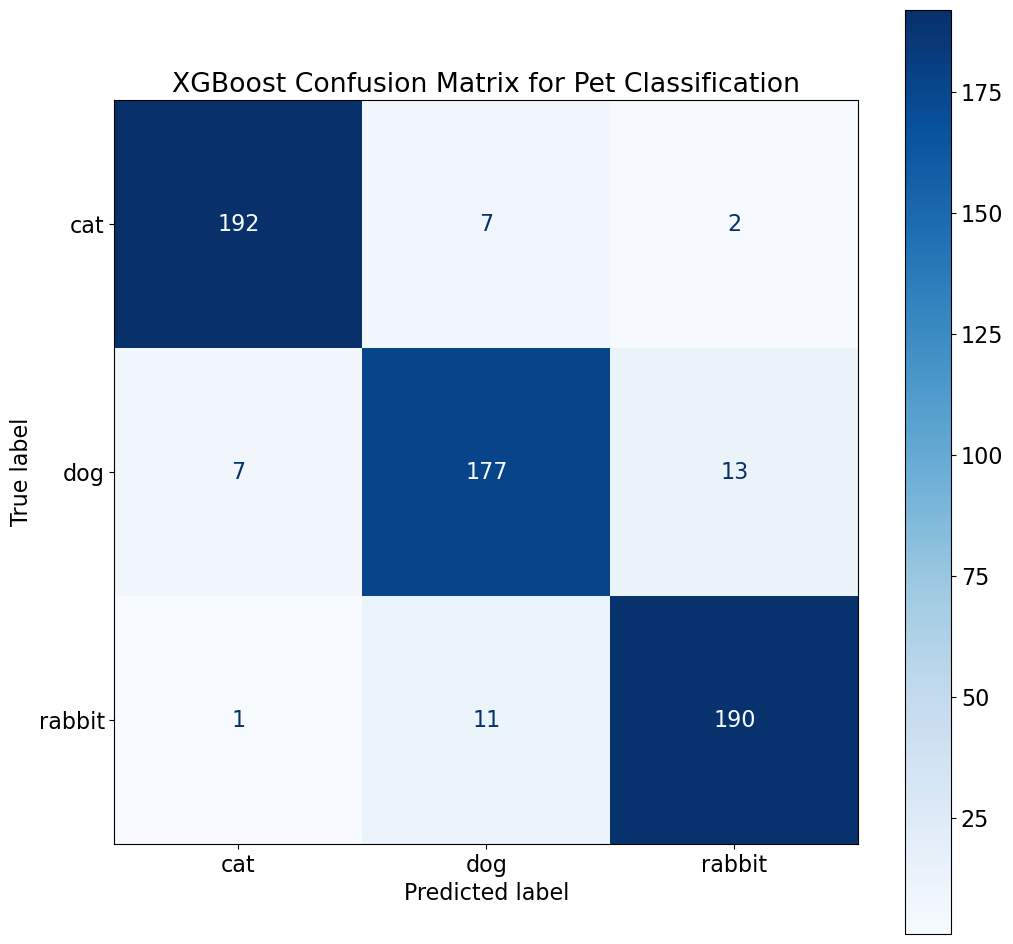

In [7]:
# Load Python packages for Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt  
import matplotlib as mpl
mpl.rcParams["font.size"] = 16

# Decision Tree
fig, ax = plt.subplots(figsize=(12, 12))
_ = ConfusionMatrixDisplay.from_estimator(dt_clf, X_test, y_test, display_labels=le.classes_,
                                          ax=ax, cmap='Blues')
plt.title("Decision Tree Confusion Matrix for Pet Classification")
plt.show()

# Random Forest
fig, ax = plt.subplots(figsize=(12, 12))
_ = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, display_labels=le.classes_,
                                          ax=ax, cmap='Blues')
plt.title("Random Forest Confusion Matrix for Pet Classification")
plt.show()

# XGBoost
fig, ax = plt.subplots(figsize=(12, 12))
_ = ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, display_labels=le.classes_,
                                          ax=ax, cmap='Blues')
plt.title("XGBoost Confusion Matrix for Pet Classification")
plt.show()


### 3.2 Plot the multi-class ROC curve

Fill in the blanks.

In [8]:
# Load Python packages for the multi-class ROC curve
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import LabelBinarizer

Decision Tree: Micro-averaged One-vs-Rest ROC AUC score:
0.87000
Random Forest: Micro-averaged One-vs-Rest ROC AUC score:
0.97647
XGBoost: Micro-averaged One-vs-Rest ROC AUC score:
0.97585


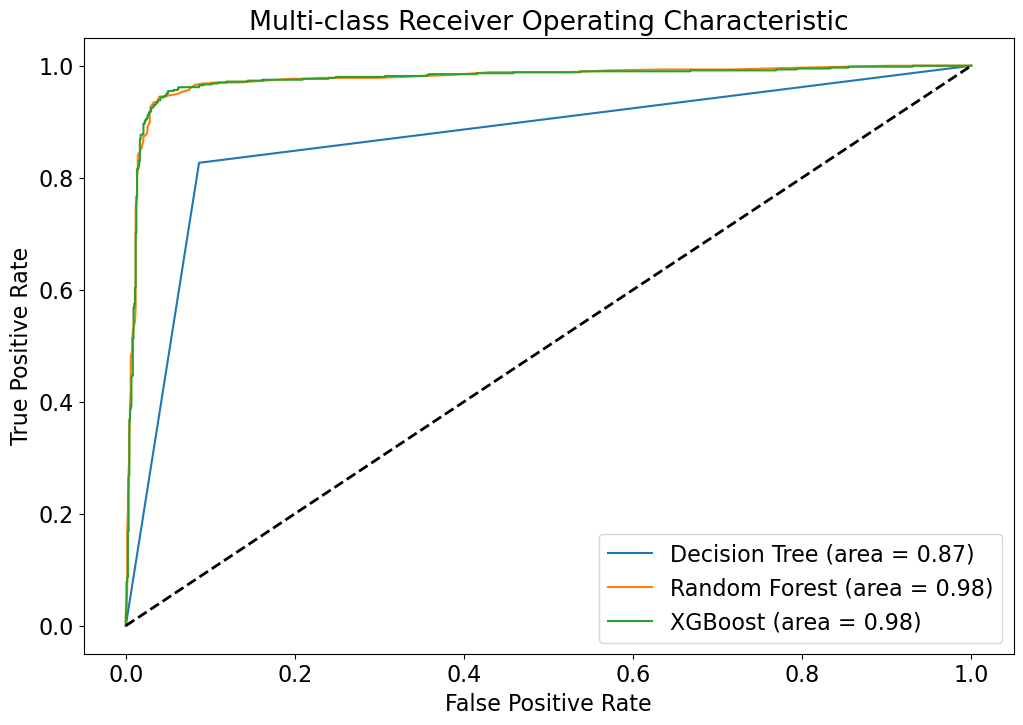

In [9]:
# Binarize labels (One-hot encoder)
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

# Calculate FPR and TPR
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["decision tree"], tpr["decision tree"], _ = roc_curve(y_onehot_test.ravel(), y_score_dt.ravel())
roc_auc["decision tree"] = auc(fpr["decision tree"], tpr["decision tree"])
fpr["random forest"], tpr["random forest"], _ = roc_curve(y_onehot_test.ravel(), y_score_rf.ravel())
roc_auc["random forest"] = auc(fpr["random forest"], tpr["random forest"])
fpr["XGBoost"], tpr["XGBoost"], _ = roc_curve(y_onehot_test.ravel(), y_score_xgb.ravel())
roc_auc["XGBoost"] = auc(fpr["XGBoost"], tpr["XGBoost"])

print(f"Decision Tree: Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['decision tree']:.5f}")
print(f"Random Forest: Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['random forest']:.5f}")
print(f"XGBoost: Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['XGBoost']:.5f}")

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(fpr["decision tree"], tpr["decision tree"], label=f'Decision Tree (area = {roc_auc["decision tree"]:.2f})')
plt.plot(fpr["random forest"], tpr["random forest"], label=f'Random Forest (area = {roc_auc["random forest"]:.2f})')
plt.plot(fpr["XGBoost"], tpr["XGBoost"], label=f'XGBoost (area = {roc_auc["XGBoost"]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic')
plt.legend()
plt.show()
